#### We will first try to explore the data

In [1]:
#import the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the dataset
data = pd.read_csv('Data/Train_data.csv')

In [3]:
#get info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       3097 non-null   int64  
 1   galactic year                                                                            3097 non-null   int64  
 2   galaxy                                                                                   3097 non-null   object 
 3   existence expectancy index                                                               3096 non-null   float64
 4   existence expectancy at birth                                                            3096 non-null   float64
 5   Gross income per capita                                       

In [4]:
#let's view the first 10 raws of our dataset
data.head(10)

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.546539,NaN,0.562809,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078351
5,10226,1000000,"Leo I Dwarf (DDO 74, UGC 5470)",0.701613,59.393718,21345.68138,0.534916,9.167112,5.942806,0.321638,...,0.458973,0.468234,0.854562,176.350623,158.4606,NaN,10.967185,NaN,NaN,0.044732
6,10238,991020,BoÃ¶tes I,0.747319,70.225157,23051.71374,0.795094,14.139791,7.887241,0.668650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052211
7,10251,992016,UGC 7577 (DDO 125),0.884287,73.155912,34042.13768,0.909842,17.008380,12.075169,0.842762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088438
8,10329,991020,KKh 98,0.888770,78.569922,21461.46920,0.698224,14.713173,8.888172,0.702012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062610
9,10368,998001,Fornax Dwarf (E356-G04),1.001783,83.250960,42759.83048,0.957864,15.096444,12.926932,1.051782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163245


#### From the outputs above: 
Our Dataset has 81 columns and 3097 rows

There are many columns which have null values. We will look at how many columns have more than 75% null values

In [5]:
#Check columns which have more than 75% of null values 
null_values = data.columns[data.isnull().mean()>0.75] 
null_values.shape

(65,)

In [6]:
#print the columns with more than 75% null values
list(null_values)

['Population, total (millions)',
 'Population, urban (%)',
 'Mortality rate, under-five (per 1,000 live births)',
 'Mortality rate, infant (per 1,000 live births)',
 'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
 'Population, ages 15â€“64 (millions)',
 'Population, ages 65 and older (millions)',
 'Life expectancy at birth, male (galactic years)',
 'Life expectancy at birth, female (galactic years)',
 'Population, under age 5 (millions)',
 'Young age (0-14) dependency ratio (per 100 creatures ages 15-64)',
 'Adolescent birth rate (births per 1,000 female creatures ages 15-19)',
 'Total unemployment rate (female to male ratio)',
 'Vulnerable employment (% of total employment)',
 'Unemployment, total (% of labour force)',
 'Employment in agriculture (% of total employment)',
 'Labour force participation rate (% ages 15 and older)',
 'Labour force participation rate (% ages 15 and older), female',
 'Employment in services (% of total employment)',
 'La

In [7]:
#Check columns which have fewer null values 
not_null_values = data.columns[data.isnull().mean()<0.75] 
not_null_values.shape

(16,)

In [8]:
list(not_null_values)

['ID',
 'galactic year',
 'galaxy',
 'existence expectancy index',
 'existence expectancy at birth',
 'Gross income per capita',
 'Income Index',
 'Expected years of education (galactic years)',
 'Mean years of education (galactic years)',
 'Intergalactic Development Index (IDI)',
 'Education Index',
 'Intergalactic Development Index (IDI), Rank',
 'Population using at least basic drinking-water services (%)',
 'Population using at least basic sanitation services (%)',
 'Gross capital formation (% of GGP)',
 'Well-Being Index']

#### From the above out outputs, we have seen that 65 columns have more than 75% null values.
In our first analysis, we will drop them and work with the remaing 16 columns to figure which variables amn ghte 16 affect the well-being.

In [9]:
#Drop the columns if missing vaklues is more than 75%
new_data = data.drop(data.columns[data.isnull().mean()>0.75], axis = 1)

In [10]:
new_data.shape

(3097, 16)

In [11]:
list(new_data.columns)

['ID',
 'galactic year',
 'galaxy',
 'existence expectancy index',
 'existence expectancy at birth',
 'Gross income per capita',
 'Income Index',
 'Expected years of education (galactic years)',
 'Mean years of education (galactic years)',
 'Intergalactic Development Index (IDI)',
 'Education Index',
 'Intergalactic Development Index (IDI), Rank',
 'Population using at least basic drinking-water services (%)',
 'Population using at least basic sanitation services (%)',
 'Gross capital formation (% of GGP)',
 'Well-Being Index']

In [12]:
#we will have a look at the new_data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           3097 non-null   int64  
 1   galactic year                                                3097 non-null   int64  
 2   galaxy                                                       3097 non-null   object 
 3   existence expectancy index                                   3096 non-null   float64
 4   existence expectancy at birth                                3096 non-null   float64
 5   Gross income per capita                                      3069 non-null   float64
 6   Income Index                                                 3069 non-null   float64
 7   Expected years of education (galactic years)                 2968 non-null   f

In [13]:
new_data.head(10)

,ID,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),Well-Being Index
0,10065,1002001,Antlia B,0.624015,56.397241,17649.87156,0.458599,7.857841,5.196527,0.507534,0.471400,247.196654,33.135967,58.079357,NaN,0.041404
1,10087,999000,KKH 11 (ZOAG G135.74-04.53),0.970048,80.924094,11409.94296,0.757218,15.869798,13.065734,0.807108,0.837559,137.299057,NaN,NaN,NaN,0.098777
2,10141,993012,Leo IV Dwarf,0.995540,82.441006,58774.29343,1.032429,17.545117,11.399711,0.973684,0.890396,74.709302,NaN,NaN,NaN,0.200747
3,10168,995006,NGC 185,1.004362,75.635986,34960.41911,0.707776,13.578086,NaN,NaN,NaN,NaN,NaN,NaN,9.558559,0.067170
4,10201,996004,Grus I,1.050627,83.412540,17073.45121,0.951402,13.518157,11.749071,0.965452,0.798000,141.210462,NaN,NaN,NaN,0.078351
5,10226,1000000,"Leo I Dwarf (DDO 74, UGC 5470)",0.701613,59.393718,21345.68138,0.534916,9.167112,5.942806,0.321638,0.341347,234.386240,43.568554,38.802884,8.293277,0.044732
6,10238,991020,BoÃ¶tes I,0.747319,70.225157,23051.71374,0.795094,14.139791,7.887241,0.668650,0.574333,134.390561,NaN,NaN,NaN,0.052211
7,10251,992016,UGC 7577 (DDO 125),0.884287,73.155912,34042.13768,0.909842,17.008380,12.075169,0.842762,0.771008,56.688177,NaN,NaN,NaN,0.088438
8,10329,991020,KKh 98,0.888770,78.569922,21461.46920,0.698224,14.713173,8.888172,0.702012,0.610460,105.550010,NaN,NaN,NaN,0.062610
9,10368,998001,Fornax Dwarf (E356-G04),1.001783,83.250960,42759.83048,0.957864,15.096444,12.926932,1.051782,0.866846,83.223095,NaN,NaN,NaN,0.163245


#### The new data stil has null values.
To clean our dataset, we will replace the values by 0

In [14]:
n_data = new_data.fillna(0)

In [15]:
n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           3097 non-null   int64  
 1   galactic year                                                3097 non-null   int64  
 2   galaxy                                                       3097 non-null   object 
 3   existence expectancy index                                   3097 non-null   float64
 4   existence expectancy at birth                                3097 non-null   float64
 5   Gross income per capita                                      3097 non-null   float64
 6   Income Index                                                 3097 non-null   float64
 7   Expected years of education (galactic years)                 3097 non-null   f

#### We will now have a look at the correlation between the columns

<AxesSubplot:>

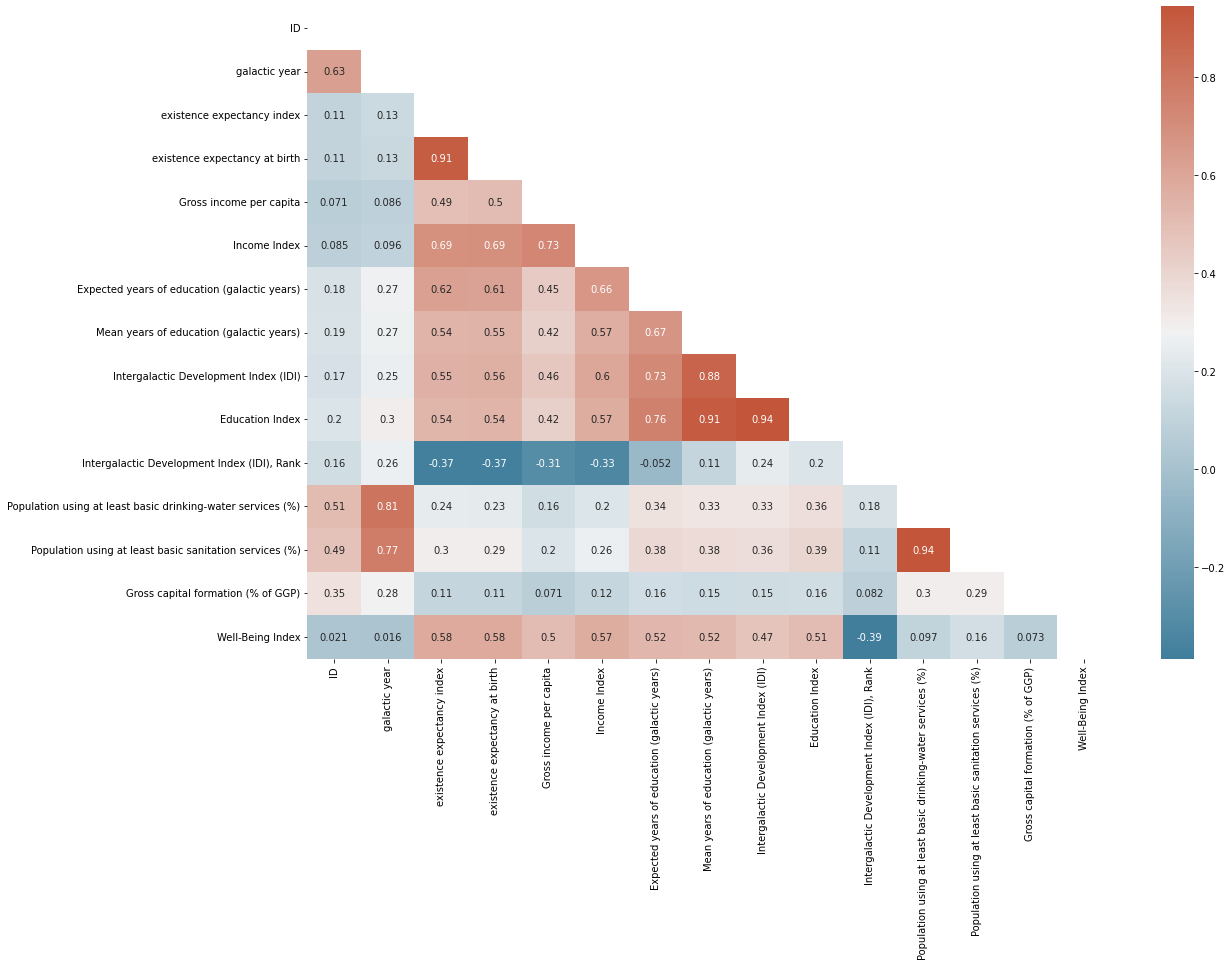

In [16]:
#import seaborn for a heat map
import seaborn as sns

variables = n_data[n_data.columns]

# Correlation between different variables
corr = variables.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(18, 12))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

##### From the above output, on the Well-being index row, 7 variables have a correlation index greater or equal to 0.5
We will consider them as factors affecting the Well-being Index, we will also add the ID

In [17]:
factors = n_data[['ID','existence expectancy index', 'existence expectancy at birth', 'Gross income per capita', 'Income Index', 
                  'Expected years of education (galactic years)', 'Mean years of education (galactic years)', 
                  'Education Index','Well-Being Index']]
prediction = 'Well-Being Index'

#We will predict the Well-Being Index using the other factors

X = np.array(factors.drop([prediction],1))
Y = np.array(factors[prediction])


C:\Program Files\KMSpico\temp\ipykernel_14192\3158007534.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(factors.drop([prediction],1))


In [18]:
# We will use a Linear Regression model to build our prediction model and use RMSE as a metric to test our model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
#We split into training and testing data with 10% of data being used for testing
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1, random_state = 25)

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [20]:
#Looking at the RMSE

prediction = model.predict(X_test)

mean_sqr_er = mean_squared_error(y_test, prediction) 

RMSE = np.sqrt(mean_sqr_er)

print('The RMSE is :', RMSE)


The RMSE is : 0.04053109996134991


In [21]:
#we look at a second model
#We split into training and testing data with 10% of data being used for testing
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1, random_state = 7)

model2 = LinearRegression()

model2.fit(X_train,y_train)

LinearRegression()

In [22]:
prediction2 = model2.predict(X_test)

mean_sqr_er = mean_squared_error(y_test, prediction) 

RMSE2 = np.sqrt(mean_sqr_er)

print('The RMSE2 is :', RMSE2)

The RMSE2 is : 0.06564040023260702


### The first RMSE is smaller than the second one, we will go or the first model

In [23]:
#Checking the prediction

predict = prediction[0]
actual = y_test[0]

print(predict, actual)

0.1353880477261823 0.088298405


## Validation data

In [24]:
#load validation data

predict_data = pd.read_csv('Data/Validation.csv')

In [25]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       720 non-null    int64  
 1   galactic year                                                                            720 non-null    int64  
 2   galaxy                                                                                   720 non-null    object 
 3   existence expectancy index                                                               720 non-null    float64
 4   existence expectancy at birth                                                            720 non-null    float64
 5   Gross income per capita                                         

In [26]:
#For the factors, we replace null values with the median

predict_data["existence expectancy index"].fillna(predict_data["existence expectancy index"].median(),inplace = True)
predict_data["existence expectancy at birth"].fillna(predict_data["existence expectancy at birth"].median(),inplace = True)
predict_data["Gross income per capita"].fillna(predict_data["Gross income per capita"].median(),inplace = True)
predict_data["Income Index"].fillna(predict_data["Income Index"].median(),inplace = True)
predict_data["Expected years of education (galactic years)"].fillna(predict_data["Expected years of education (galactic years)"].median(),inplace = True)
predict_data["Mean years of education (galactic years)"].fillna(predict_data["Mean years of education (galactic years)"].median(),inplace = True)
predict_data["Education Index"].fillna(predict_data["Education Index"].median(),inplace = True)


In [27]:
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 81 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   ID                                                                                       720 non-null    int64  
 1   galactic year                                                                            720 non-null    int64  
 2   galaxy                                                                                   720 non-null    object 
 3   existence expectancy index                                                               720 non-null    float64
 4   existence expectancy at birth                                                            720 non-null    float64
 5   Gross income per capita                                         

In [28]:
#prediction 

validation_values  = np.array(predict_data[['ID','existence expectancy index', 'existence expectancy at birth', 'Gross income per capita', 'Income Index', 
                  'Expected years of education (galactic years)', 'Mean years of education (galactic years)', 
                  'Education Index']])

predicted_values = model.predict(validation_values)


In [41]:
galaxy_id = list(predict_data['ID'])

predicted_index = list(predicted_values)

predictions = pd.DataFrame(list(zip(galaxy_id, predicted_index)),
              columns=['ID','Predicted Well-Being Index'])

predictions.head(10)


,ID,Predicted Well-Being Index
0,886447,0.069210
1,687564,0.067672
2,494935,0.059533
3,378919,0.068091
4,421878,0.060269
5,949719,0.050257
6,898972,0.050232
7,375574,0.071497
8,569844,0.128912
9,654472,0.112305


In [42]:
#Save the Dataframe to CSV
predictions.to_csv('Innocent_Baluge.csv')